# scikit-learn中的PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
print(X.shape, y.shape)

(1797, 64) (1797,)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=321)

In [12]:
X_train.shape

(1347, 64)

In [13]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

CPU times: user 59.6 ms, sys: 3.67 ms, total: 63.3 ms
Wall time: 86.7 ms


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
# 使用 kNN 算法
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
knn_clf.score(X_test, y_test)

0.9844444444444445

##### PCA 降维

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [18]:
pca.n_components

2

In [17]:
print(X_train_reduction[:5])

[[  2.70449364  -2.49402221]
 [ 20.68806484  -3.9583911 ]
 [-31.35655584   5.31201006]
 [ -1.35860878  22.16577226]
 [-18.13368773  -5.4686694 ]]


In [14]:
%%time
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

Wall time: 2 ms


In [15]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)
knn_clf.score(X_test_reduction, y_test)

0.6511111111111111

- 如上所示，数据经过降维，计算时间大大减少，但同时识别精度也相应降低了

In [19]:
pca.explained_variance_ratio_

array([0.15015293, 0.13219468])

#### explained_variance_ratio_

In [20]:
pca = PCA(n_components=X_train.shape[1])
pca.fit(X_train)
# explained_variance_ratio_ 存放的是每一个轴对数据的解释比例，从大到小排列
pca.explained_variance_ratio_

array([1.50152930e-01, 1.32194680e-01, 1.17926119e-01, 8.54952296e-02,
       5.65001090e-02, 4.94758583e-02, 4.34301568e-02, 3.67661698e-02,
       3.33321513e-02, 3.19844934e-02, 2.37794610e-02, 2.33197584e-02,
       1.82773976e-02, 1.72518406e-02, 1.48769282e-02, 1.43579978e-02,
       1.30706373e-02, 1.27201733e-02, 1.00280793e-02, 9.30009495e-03,
       9.06144405e-03, 8.02984212e-03, 7.80683702e-03, 7.25551897e-03,
       6.91309582e-03, 5.99016782e-03, 5.85006310e-03, 5.02956540e-03,
       4.90804838e-03, 4.48466558e-03, 3.68947608e-03, 3.49118820e-03,
       3.27684273e-03, 3.22605420e-03, 3.11562536e-03, 2.89330048e-03,
       2.54044510e-03, 2.25800984e-03, 2.16644583e-03, 2.11503720e-03,
       1.84695920e-03, 1.56421691e-03, 1.47007116e-03, 1.37212180e-03,
       1.15550320e-03, 1.07993216e-03, 9.75576901e-04, 8.56396889e-04,
       5.34731712e-04, 4.15912452e-04, 1.52236841e-04, 8.19850226e-05,
       4.74445806e-05, 4.32663907e-05, 4.05450706e-05, 1.18959019e-05,
      

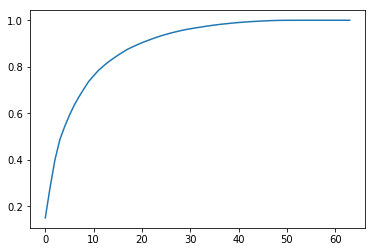

In [21]:
# 横轴：维度
# 纵轴：前 i 个方差解释的和
plt.plot([i for i in range(X_train.shape[1])],
        [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X_train.shape[1])])

- 可以通过此曲线，来找到应该降到多少维度

In [23]:
pca = PCA(0.95) # 主成分可以解释 95% 以上的方差
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
pca.n_components_ # 可以看到，要想主成分解释达到 95% 以上，需要把降到 28 维

28

In [25]:
X_train_reduction = pca.transform(X_train)
X_test_reduction = pca.transform(X_test)

In [26]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_reduction, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [28]:
knn_clf.score(X_test_reduction, y_test)
# 可以看到，保留 28 个维度，识别率和不降维几乎不变

0.9866666666666667

#### 降到低维有助于可视化

In [29]:
pca = PCA(n_components=2)
pca.fit(X_train)
X_reduction = pca.transform(X)

In [30]:
X_reduction.shape

(1797, 2)

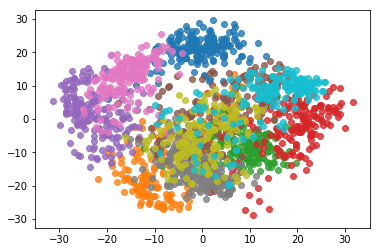

In [31]:
for i in range(10):
    plt.scatter(X_reduction[y==i, 0], X_reduction[y==i, 1], alpha=0.8)